In [1]:
import pandas as pd

In [2]:
#read csv file
df = pd.read_csv('responses.csv')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [3]:
#select only 5 columns
df = df[['Music', 'Dance', 'Folk', 'Age', 'Gender']]
df

,Music,Dance,Folk,Age,Gender
0,5.0,2.0,1.0,20.0,female
1,4.0,2.0,1.0,19.0,female
2,5.0,2.0,2.0,20.0,female
3,5.0,2.0,1.0,22.0,female
4,5.0,4.0,3.0,20.0,female
...,...,...,...,...,...
1005,5.0,5.0,2.0,20.0,female
1006,4.0,5.0,1.0,27.0,male
1007,4.0,1.0,1.0,18.0,female
1008,5.0,3.0,3.0,25.0,female


In [4]:
df.describe()

,Music,Dance,Folk,Age
count,1007.000000,1006.000000,1005.000000,1003.000000
mean,4.731877,3.113320,2.288557,20.433699
std,0.664049,1.170568,1.138916,2.828840
min,1.000000,1.000000,1.000000,15.000000
25%,5.000000,2.000000,1.000000,19.000000
50%,5.000000,3.000000,2.000000,20.000000
75%,5.000000,4.000000,3.000000,22.000000
max,5.000000,5.000000,5.000000,30.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Music   1007 non-null   float64
 1   Dance   1006 non-null   float64
 2   Folk    1005 non-null   float64
 3   Age     1003 non-null   float64
 4   Gender  1004 non-null   object 
dtypes: float64(4), object(1)
memory usage: 35.6+ KB


In [10]:
df.shape

(1010, 5)

In [12]:
df.dropna(inplace=True)

In [17]:
df.shape

(987, 5)

In [18]:
df.head()

,Music,Dance,Folk,Age,Gender
0,5.0,2.0,1.0,20.0,female
1,4.0,2.0,1.0,19.0,female
2,5.0,2.0,2.0,20.0,female
3,5.0,2.0,1.0,22.0,female
4,5.0,4.0,3.0,20.0,female


In [20]:
from sklearn.preprocessing import LabelEncoder
df['Code'] = LabelEncoder().fit_transform(df.Gender)
df.drop(['Gender'], axis=1, inplace=True)

In [23]:
df['Music'] = [int(i) for i in df['Music']]
df['Dance'] = [int(i) for i in df['Dance']]
df['Folk'] = [int(i) for i in df['Folk']]
df['Age'] = [int(i) for i in df['Age']]
df.head()

,Music,Dance,Folk,Age,Code
0,5,2,1,20,0
1,4,2,1,19,0
2,5,2,2,20,0
3,5,2,1,22,0
4,5,4,3,20,0


In [24]:
X = df.drop(['Music'], axis=1)
y = df['Music']

In [25]:
print(X.shape)
print(y.shape)

(987, 4)
(987,)


__scikit-learn 4-step modeling pattern__

In [26]:
#Step 1: Import the class you plan to use
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#Step 2: "Instantiate" the "estimator"
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(n_neighbors=1)

In [28]:
#Step 3: Fit the model with data (aka "model training")
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [29]:
#Step 4: Predict the response for a new observation
knn.predict([[3, 5, 4, 2]])

array([5], dtype=int64)

In [30]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([5, 5], dtype=int64)

__Using a different value for K__

In [32]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([5, 5], dtype=int64)

__Using a different classification model__

In [33]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict(X_new)

array([5, 5], dtype=int64)

In [34]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

987

In [35]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.8156028368794326


__KNN (K=5)__

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.8145896656534954


__KNN (K=1)__

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.8196555217831814


# Train/test split

In [38]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(987, 4)
(987,)


In [39]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [40]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(592, 4)
(395, 4)


In [41]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(592,)
(395,)


In [42]:
# STEP 2: train the model on the training set
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [43]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.8025316455696202


In [44]:
#Repeat for KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.769620253164557


In [45]:
#Repeat for KNN with K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6784810126582278


In [46]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

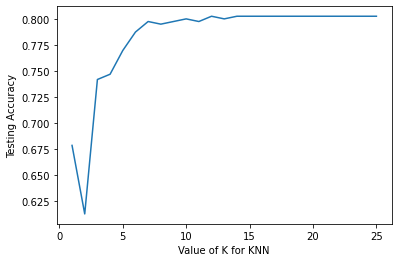

In [47]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')